<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Epid_T6_SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
n = 10  # vertices
m = 20  # arcos
seed = 2016  # semilla para generador de números aleatorios

G = nx.gnm_random_graph(n, m, seed=seed)

print("Lista de Adyacencias")
for line in nx.generate_adjlist(G):
    print(line)

Lista de Adyacencias
0 9 5 6
1 4 7 8 6 2
2 4 5 7
3 5 4 6 9
4 9 7
5 7
6
7 8
8 9
9


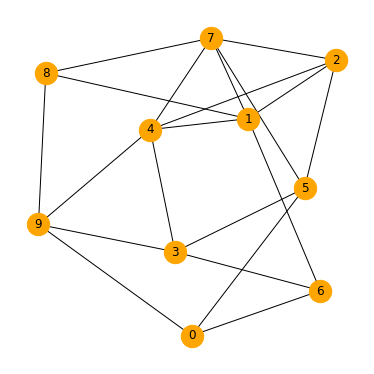

In [ ]:
plt.figure(1,figsize=(5,5))
pos = nx.spring_layout(G, seed=seed)  #para mantener la misma posición
nx.draw(G, with_labels=True,node_color="orange",pos=pos,node_size=500)
plt.show()

In [ ]:
print("Matriz de Adyacencias")
A = nx.to_numpy_matrix(G)
A

Matriz de Adyacencias


matrix([[0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
        [0., 0., 1., 0., 1., 0., 1., 1., 1., 0.],
        [0., 1., 0., 0., 1., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
        [0., 1., 1., 1., 0., 0., 0., 1., 0., 1.],
        [1., 0., 1., 1., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 1., 1., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
        [1., 0., 0., 1., 1., 0., 0., 0., 1., 0.]])

Resdes GNP

In [ ]:
n = 10  # vertices
p = 0.5  # probability
seed = 2016  # semilla para generador de números aleatorios

G = nx.gnp_random_graph(n, p, seed=seed)

Redes dada una sucesion de grados

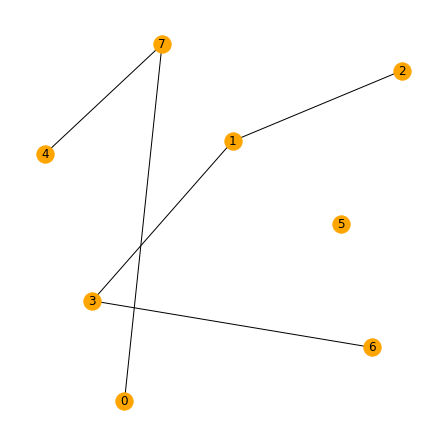

In [ ]:
ks=[1,2,1,2,1,0,1,2]
G = nx.configuration_model(ks)
plt.figure(1,figsize=(6,6))
nx.draw(G, with_labels=True,node_color="orange",pos=pos)
plt.show()

In [ ]:
import numpy as np
np.random.seed(0)
k = np.random.poisson(5, 100)  #generamos 100 vertices con grado Poisson(5)
print("Sucesión de Grados")
print(k)
sg = k.tolist()
print("La suma de grados debe ser par")
print(sum(sg))
G = nx.configuration_model(sg)

Sucesión de Grados
[ 9  5  6  5  5  8  4  5  4  3  3  7  3  3  4  5  2  1  7  7 10  5  8  8
  6  4  4  3  1  5  6  5  5  4  1  7  2  7  6  2  6  5  7  5  4  5 10  6
  4  7  3  2  2  6  2  5  3  6  2  4  4  4  8  7 11  3  4  1  4  5  1  2
  2  5  5  5  7  8  4  6  4 10  3  8  5  7  3  8  2  1  4  4  4  4  6  4
 12  1  6  3]
La suma de grados debe ser par
484


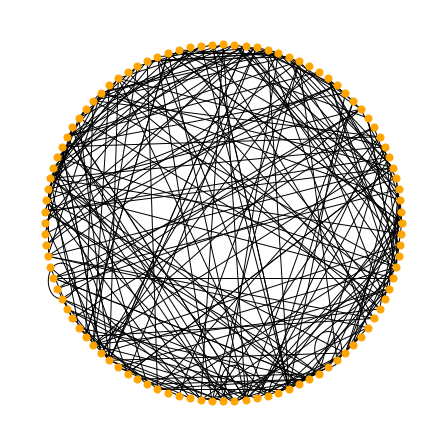

In [ ]:
plt.figure(1,figsize=(6,6))
nx.draw(G, with_labels=False,node_color="orange",pos=nx.circular_layout(G),node_size=50)

In [2]:
import collections
degree_sequence = sorted([d for n,d in G.degree()], reverse=True) 
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color='b')

NameError: ignored

Modelos en redes.

In [3]:
!pip install EoN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 113 kB 4.3 MB/s 
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120818 sha256=af8d2641f34a61c6c9191d024fb60a91caf78b57e598a096d47fdd1ea01d29bf
  Stored in directory: /root/.cache/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built EoN


In [4]:
import EoN

import networkx as nx
from matplotlib import rc
import matplotlib.pylab as plt

#import scipy
#import random
import numpy as np

import scipy.stats as stats

Caso de una red 3-regular.

In [5]:
G = nx.random_regular_graph(d=3,n=1000,seed=0)

In [6]:
plt.figure(1,figsize=(5,5))
pos = nx.spring_layout(G, seed=seed)  #para mantener la misma posición


NameError: ignored

<Figure size 360x360 with 0 Axes>

In [ ]:
nx.draw(G, with_labels=False,node_color="orange",pos=pos,node_size=5)
plt.show()

In [ ]:
tmax = 20
iterations = 20   # corre 20 simulaciones
R = 0.2        # tasa de transmisión
gamma = 1.0      # tasa de recuperación
rho = 0.005      # fracción aleatoria de casos infectados iniciales

for i in range(iterations): # corre la simulaciones
    t, S, I, R = EoN.fast_SIR(G, R, gamma, rho=rho, tmax = tmax)
    if i == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)

# Ejercicio 3.

In [74]:
N=1000
tau = 0.5       # tasa de transmisión
gamma = 0.1     # tasa de recuperación
#ts = scipy.arange(0,40,0.05)
count = 100      # number of simulations to run for each
colors = ['#5AB3E6','#FF2000','#009A80','#E69A00', '#CD9AB3', '#0073B3',
        '#F0E442']

def sir_sim(k_poiss, N, color, label, count,nodo_fijo):
    report_times = np.arange(0,30,0.1) #scipy.linspace(0,30,3000)
    sums = 0*report_times
    I_s=[]
    K_s=[]
    for cnt in range(count):
        G = nx.configuration_model(k_poiss)
        t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds=nodo_fijo)#initial_infecteds es el nodo infectado.
        K_s.append(G.degree[nodo_fijo])
        I_s.append(R[-1])#Los que se recuperaron
    return(K_s,I_s)

In [84]:
np.random.seed(10)
G_p = nx.configuration_model(np.random.poisson(3.5,100))

In [86]:
G_p.degree[0]

1

In [102]:
M_k=[]
SD_k=[]
for count_k in range(10):#Para cada red.
    np.random.seed(count_k)
    ksum=1
    if(count_k%2==0):
        print("Iteración :",count_k)
    while(ksum%2!=0):
        k=np.random.poisson(3.5,1000)
        ksum=sum(k)
    K_s_k,I_s_k=sir_sim(k_poiss=k,N=N,color=colors[0],label='poiss',count=500,nodo_fijo=0)#Cada uno tiene longitud "count"
    mean_k=np.mean(I_s_k)
    sd_k=np.std(I_s_k)
    M_k.append(mean_k)
    SD_k.append(sd_k)

Iteración : 0
Iteración : 2
Iteración : 4
Iteración : 6
Iteración : 8


In [103]:
print(np.std(M_k))
print(np.std(SD_k))

347.8104053477986
101.12574985711903


(array([2., 0., 0., 0., 0., 0., 0., 0., 1., 7.]),
 array([  1.    ,  90.4648, 179.9296, 269.3944, 358.8592, 448.324 ,
        537.7888, 627.2536, 716.7184, 806.1832, 895.648 ]),
 <a list of 10 Patch objects>)

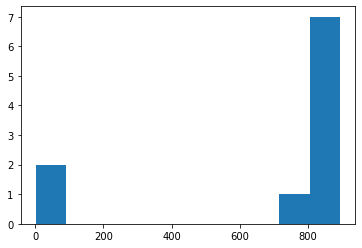

In [136]:
plt.hist(M_k)

In [153]:
K_s=[]
I_s=[]
Coef_assortativity_degree=[]
Coef_agrupamiento=[]
for k in range(100):
    np.random.seed(k)
    nodo=np.random.randint(0,1000)
    ksum=1
    while(ksum%2!=0):
        k_poiss=np.random.poisson(3.5,1000)
        ksum=sum(k_poiss)
    G = nx.configuration_model(k_poiss)
    K_s.append(G.degree[nodo])
    Coef_assortativity_degree.append(nx.assortativity.degree_assortativity_coefficient(G))#Diferente para cada grafica.
    G2 = nx.DiGraph(G)#Para calcular el clustering
    Coef_agrupamiento.append(nx.clustering(G2,nodo))#Diferente para cada grafica
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds=0)#initial_infecteds es el nodo infectado.
    I_s.append(R[-1])#Los que se recuperaron


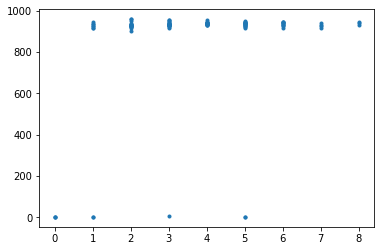

In [93]:
plt.plot(K_s,I_s,'.')

In [155]:
x=np.array(np.array(K_s).reshape((-1, 1)))
x2=np.array(np.array(Coef_assortativity_degree).reshape((-1, 1)))
x3=np.array(np.array(Coef_agrupamiento).reshape((-1, 1)))
y=np.array(I_s)

In [177]:
df = pd.DataFrame(data)
import statsmodels.api as sm
x = sm.add_constant(df['grado']) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print(model.ess)
print_model = model.summary()
print(print_model)

6727.632820509374
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.07751
Date:                Tue, 15 Nov 2022   Prob (F-statistic):              0.781
Time:                        02:13:06   Log-Likelihood:                -709.45
No. Observations:                 100   AIC:                             1423.
Df Residuals:                      98   BIC:                             1428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        814.1031     66.883  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


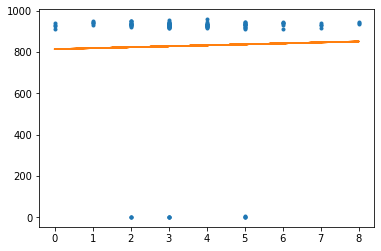

In [178]:
plt.plot(K_s,I_s,'.')
plt.plot(K_s,model.params[0]+np.array(K_s)*model.params[1])
plt.show()

In [179]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
data = {'grado': K_s,
        'assortivity': Coef_assortativity_degree,
        'clustering': Coef_agrupamiento,       
        }
import pandas as pd
df = pd.DataFrame(data)
import statsmodels.api as sm
x = sm.add_constant(df) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print(model.ess)
print_model = model.summary()
print(print_model)

42665.830527540296
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.1612
Date:                Tue, 15 Nov 2022   Prob (F-statistic):              0.922
Time:                        02:13:17   Log-Likelihood:                -709.24
No. Observations:                 100   AIC:                             1426.
Df Residuals:                      96   BIC:                             1437.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         812.2075     67.5

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Ejercicio 4

In [187]:
ksum=1
while(ksum%2!=0):
    k_poiss=np.random.poisson(3,1000)
    ksum=sum(k_poiss)
G = nx.configuration_model(k_poiss)
R=[0]
while(R[-1]<10):
    t, S, I, R = EoN.fast_SIR(G, 0.1, 1, initial_infecteds=0)#initial_infecteds es el nodo infectado.

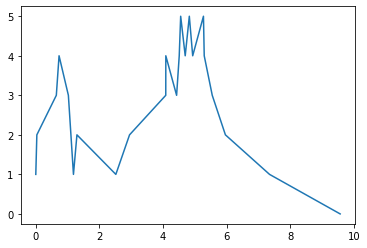

In [189]:
plt.plot(t,I)
plt.show()

In [223]:
j=0
aggreg=0
by_days_accum=[]
for k in range(1,10):
    while(t[j]<k):
        aggreg+=I[j]
        j+=1
    by_days_accum.append(aggreg)

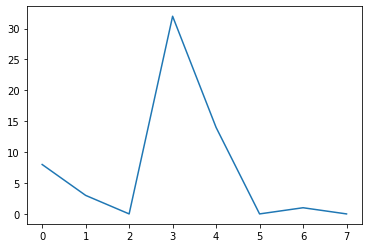

In [225]:
plt.plot(np.diff(by_days_accum))

In [226]:
by_days_accum

[10, 18, 21, 21, 53, 67, 67, 68, 68]